# Part 3

In part3, we define our own model by twitter data sentiment analysis. Firstly, we get the text of every tweet in hashtag files. Secondly, We use SentimentIntensityAnalyzer in nltk to get the sentiment of the text. We define 'posivite'=1,'negative'=-1,'neutral'=0. Finally, we calculate the sum of sentiment value per hour and get the value vs time plot. As it shows in figures of #GoPatriots and #GoHawks, people show more positive attitudes toward Hawks before the game begin and show more positive attitudes toward Patriots after the game. This result is in accordance with the final result of the game, which the winner is Patriots.

In [39]:
import os
import json
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cross_validation import cross_val_predict
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
import datetime
import pytz
pst_tz = pytz.timezone('US/Pacific')
time0=datetime.datetime.fromtimestamp(1421222400, pst_tz)
time1=datetime.datetime.fromtimestamp(1422806400, pst_tz)
time2=datetime.datetime.fromtimestamp(1422849600, pst_tz)
print(time0)
print(time1)
print(time2)

firsttime = int((1422806400-1421222400)/3600)
print(firsttime)
secondtime = int((1422849600-1421222400)/3600)
print(secondtime)

2015-01-14 00:00:00-08:00
2015-02-01 08:00:00-08:00
2015-02-01 20:00:00-08:00
440
452


In [52]:
def extract_information(hashtag):
    print(hashtag)
    hashtag_dict = {'#GoHawks' : ['tweet_data/tweets_#gohawks.txt', 188136],
                    '#GoPatriots' : ['tweet_data/tweets_#gopatriots.txt', 26232],
                    '#NFL' : ['tweet_data/tweets_#nfl.txt', 259024],
                    '#Patriots' : ['tweet_data/tweets_#patriots.txt', 489713],
                    '#SB49' : ['tweet_data/tweets_#sb49.txt', 826951],
                    '#SuperBowl' : ['tweet_data/tweets_#superbowl.txt', 1348767]}
    
    time_stamps = [0]*hashtag_dict[hashtag][1]
    sentiment_tweets = [0]*hashtag_dict[hashtag][1]
       
    with open(hashtag_dict[hashtag][0]) as input_file:
        for (line, index) in zip(input_file, range(0, hashtag_dict[hashtag][1])):
            data = json.loads(line)
            
            time_stamps[index] = data['citation_date']
            sid = SentimentIntensityAnalyzer()
            sentence = data['tweet']['text']
            
            
            ss = sid.polarity_scores(sentence)
            pos = ss['pos']
            neg = ss['neg']
            if pos>neg:
                sentiment_tweets[index] = 1
            elif neg>pos:
                sentiment_tweets[index] = -1
            else:
                sentiment_tweets[index] = 0

    input_file.close()
    
 #-------------------- Calculate related parameters ------------------------

    start_time = 1421222400
    hours_passed = int((max(time_stamps)-start_time)/3600)+1
    
    hourly_number_of_tweets = [0] * hours_passed
    hourly_sum_of_sentiment = [0] * hours_passed

    for i in range(0, len(time_stamps)):
        current_hour = int((time_stamps[i]-start_time)/3600)
        hourly_number_of_tweets[current_hour] += 1

        hourly_sum_of_sentiment[current_hour] += sentiment_tweets[i]

    #------------------ Build DataFrame and save to file ----------------------

    target_value = hourly_number_of_tweets[1:]
    target_value.append(0)
    data = np.array([hourly_number_of_tweets, hourly_sum_of_sentiment,target_value])

    data = np.transpose(data)

    df = DataFrame(data)
    df.columns = ['num_tweets', 'sentiment_tweets', 'target_value']
    
    if os.path.isdir('./Extracted_data'):
        pass
    else:
        os.mkdir('./Extracted_data')

    df.to_csv('./Extracted_data/P3_'+hashtag+'.csv', index = False)   

#==============================================================================
    



In [53]:
def get_sentiment(hashtag):
    extract_information(hashtag)
    training_data = pd.read_csv('./Extracted_data/P3_'+hashtag+'.csv')


    target_data = training_data.pop('target_value')
    sentiment_data = training_data.pop('sentiment_tweets')
    training_data1 = sentiment_data[:440] # Before Feb. 1, 8:00 a.m.
    training_data2 = sentiment_data[440:452] # Between Feb. 1, 8:00 a.m. and 8:00 p.m.
    training_data3 = sentiment_data[452:] # After Feb. 1, 8:00 p.m. 
    time_tweet = range(len(sentiment_data))
               
    plt.plot(time_tweet,sentiment_data)
    plt.show()
    


#GoPatriots


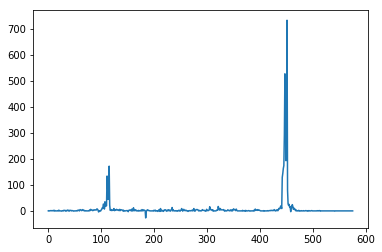

In [55]:
get_sentiment('#GoPatriots')

#GoHawks


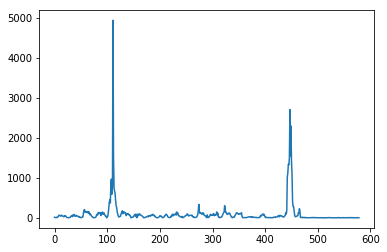

In [56]:
get_sentiment('#GoHawks')